<a href="https://colab.research.google.com/github/caseynv/SVM-project/blob/master/SVM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SVM for the Climate Model Simulation Crashes data**

In [48]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split

%matplotlib inline

##DATA COLLECTION

In [49]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#load data from datasource, url
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat"
df = pd.read_csv(url, sep='\s+')
df

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,176,0.657136,0.489375,0.133713,0.411950,0.087780,0.356289,0.480204,0.029678,...,0.280546,0.384117,0.885948,0.768482,0.459479,0.334482,0.573002,0.610183,0.737706,1
536,3,177,0.915894,0.842720,0.518947,0.090622,0.336981,0.893576,0.978703,0.674868,...,0.798108,0.353546,0.044796,0.990900,0.347027,0.512499,0.810549,0.593332,0.142565,0
537,3,178,0.478600,0.941185,0.769245,0.950776,0.189406,0.112743,0.745645,0.527096,...,0.193103,0.829563,0.101506,0.548878,0.381966,0.198811,0.867108,0.461632,0.652817,1
538,3,179,0.007793,0.779287,0.867468,0.704820,0.983282,0.420303,0.710612,0.174746,...,0.761134,0.436714,0.690132,0.825133,0.981656,0.113193,0.364799,0.201469,0.536535,1


##DATA COLLECTION

In [51]:
# Display basic information about the DataFrame
print("Data Types:")
print(df.dtypes)

Data Types:
Study                     int64
Run                       int64
vconst_corr             float64
vconst_2                float64
vconst_3                float64
vconst_4                float64
vconst_5                float64
vconst_7                float64
ah_corr                 float64
ah_bolus                float64
slm_corr                float64
efficiency_factor       float64
tidal_mix_max           float64
vertical_decay_scale    float64
convect_corr            float64
bckgrnd_vdc1            float64
bckgrnd_vdc_ban         float64
bckgrnd_vdc_eq          float64
bckgrnd_vdc_psim        float64
Prandtl                 float64
outcome                   int64
dtype: object


In [52]:
# indicating if the values are NA/nan
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Study                   0
Run                     0
vconst_corr             0
vconst_2                0
vconst_3                0
vconst_4                0
vconst_5                0
vconst_7                0
ah_corr                 0
ah_bolus                0
slm_corr                0
efficiency_factor       0
tidal_mix_max           0
vertical_decay_scale    0
convect_corr            0
bckgrnd_vdc1            0
bckgrnd_vdc_ban         0
bckgrnd_vdc_eq          0
bckgrnd_vdc_psim        0
Prandtl                 0
outcome                 0
dtype: int64


In [53]:
#descriptive statistics
print("\nSummary Statistics:")
#this can also be used to check for outliers from the mean and the maximum value
print(df.describe())


Summary Statistics:
            Study         Run  vconst_corr    vconst_2    vconst_3  \
count  540.000000  540.000000   540.000000  540.000000  540.000000   
mean     2.000000   90.500000     0.500026    0.500097    0.500027   
std      0.817254   52.008901     0.288939    0.288922    0.289067   
min      1.000000    1.000000     0.000414    0.001922    0.001181   
25%      1.000000   45.750000     0.249650    0.251597    0.251540   
50%      2.000000   90.500000     0.499998    0.499595    0.500104   
75%      3.000000  135.250000     0.750042    0.750011    0.749180   
max      3.000000  180.000000     0.999194    0.998815    0.998263   

         vconst_4    vconst_5    vconst_7     ah_corr    ah_bolus  ...  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  ...   
mean     0.500119    0.500001    0.499913    0.500059    0.500076  ...   
std      0.288993    0.288827    0.288852    0.289010    0.288909  ...   
min      0.001972    0.000858    0.000476    0.00459

In [54]:
#returns information about the data
print(df.info())

#returns the number of unique values for each column
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    float64
 14  convect_corr          540 non-null    float64
 15  bckgrnd_vdc1          5

<Axes: xlabel='variable', ylabel='value'>

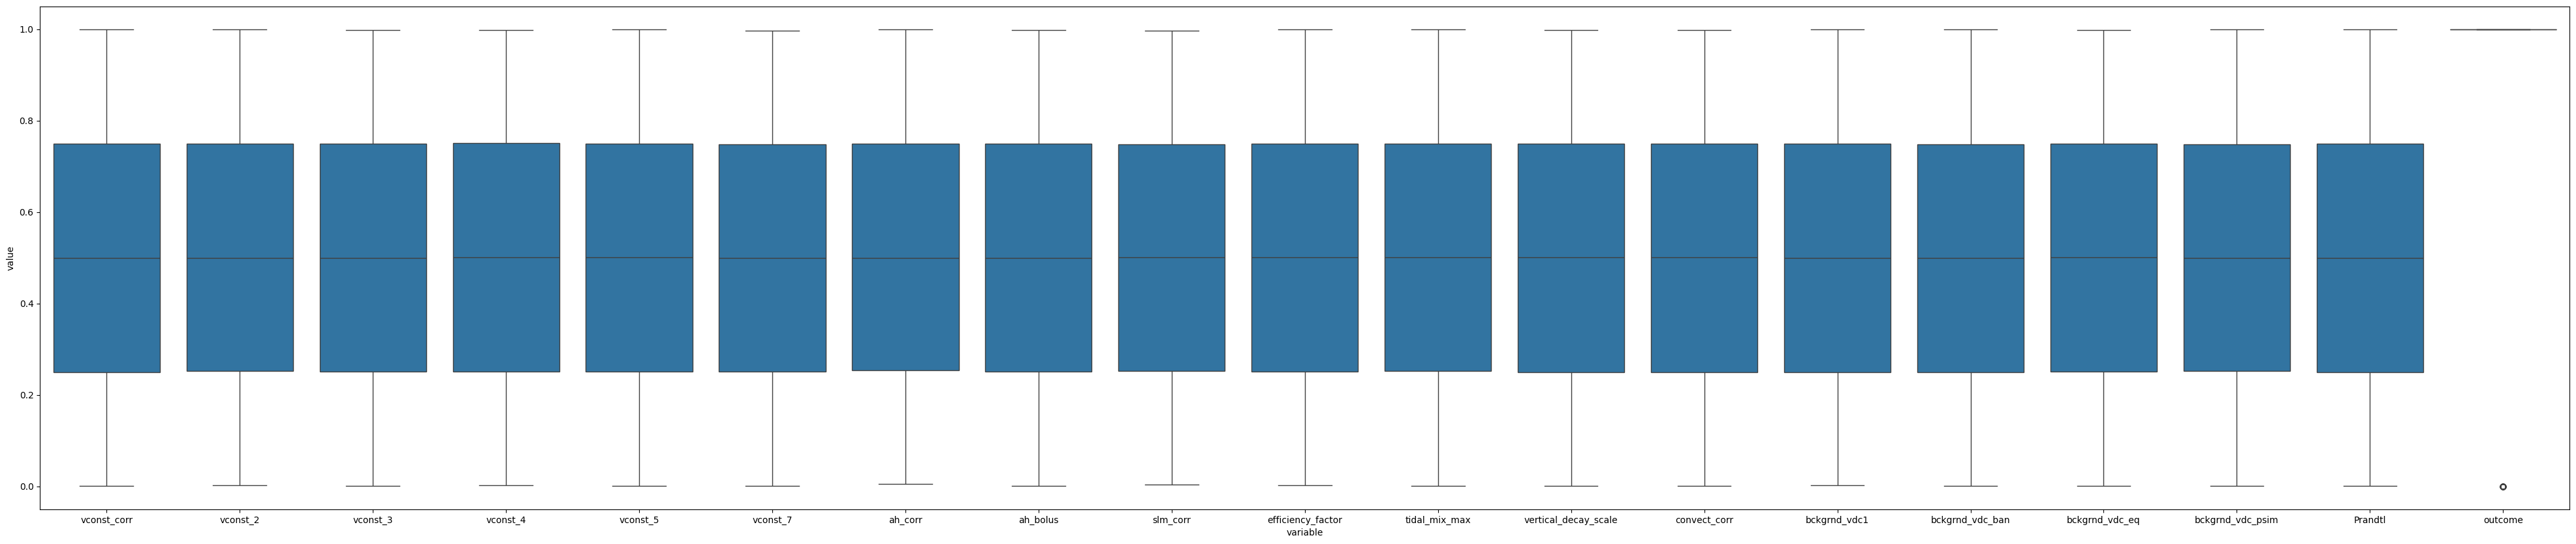

In [72]:
#this is used to visualise the data and check for outliers
plt.figure(figsize = (50,10))
sns.boxplot(data = df.melt(),
            x = 'variable',
            y = 'value' )

In [56]:
# Remove the first two columns
df = df.iloc[:, 2:]

# Display the DataFrame after removing the first two columns
print(df)

     vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_7   ah_corr  \
0       0.859036  0.927825  0.252866  0.298838  0.170521  0.735936  0.428325   
1       0.606041  0.457728  0.359448  0.306957  0.843331  0.934851  0.444572   
2       0.997600  0.373238  0.517399  0.504993  0.618903  0.605571  0.746225   
3       0.783408  0.104055  0.197533  0.421837  0.742056  0.490828  0.005525   
4       0.406250  0.513199  0.061812  0.635837  0.844798  0.441502  0.191926   
..           ...       ...       ...       ...       ...       ...       ...   
535     0.657136  0.489375  0.133713  0.411950  0.087780  0.356289  0.480204   
536     0.915894  0.842720  0.518947  0.090622  0.336981  0.893576  0.978703   
537     0.478600  0.941185  0.769245  0.950776  0.189406  0.112743  0.745645   
538     0.007793  0.779287  0.867468  0.704820  0.983282  0.420303  0.710612   
539     0.608075  0.031556  0.598264  0.794771  0.145680  0.378183  0.461948   

     ah_bolus  slm_corr  efficiency_fac

In [57]:
#check for collinearity/multicollinearity between features and feature and the target variable, outcome
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})

<ipython-input-57-d185279439e6>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})


,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
vconst_corr,1.000,0.004,0.009,-0.018,0.019,0.002,0.004,-0.013,0.002,0.011,-0.014,-0.009,-0.003,-0.002,-0.002,0.016,-0.017,-0.001,-0.305
vconst_2,0.004,1.000,-0.000,-0.001,-0.008,-0.024,-0.005,0.004,-0.014,-0.011,0.020,0.002,0.003,-0.015,0.004,0.006,0.004,0.009,-0.302
vconst_3,0.009,-0.000,1.000,0.010,0.006,-0.002,0.020,0.004,-0.008,0.007,-0.009,-0.025,-0.021,-0.004,-0.005,-0.001,0.005,-0.001,0.000
vconst_4,-0.018,-0.001,0.010,1.000,0.021,0.022,0.002,-0.002,-0.002,-0.005,0.018,-0.010,-0.007,0.020,-0.001,-0.009,-0.017,0.005,0.072
vconst_5,0.019,-0.008,0.006,0.021,1.000,0.006,-0.003,0.012,0.004,0.001,0.021,-0.016,0.021,0.010,-0.019,-0.021,-0.009,0.012,0.054
vconst_7,0.002,-0.024,-0.002,0.022,0.006,1.000,-0.017,-0.022,0.001,0.015,0.000,0.015,0.007,-0.004,-0.008,-0.007,0.013,0.008,0.049
ah_corr,0.004,-0.005,0.020,0.002,-0.003,-0.017,1.000,-0.035,-0.005,0.010,-0.007,0.017,0.003,0.012,-0.003,0.007,0.002,-0.002,0.017
ah_bolus,-0.013,0.004,0.004,-0.002,0.012,-0.022,-0.035,1.000,-0.009,0.012,0.012,-0.004,-0.019,-0.011,0.005,0.032,0.000,0.007,0.004
slm_corr,0.002,-0.014,-0.008,-0.002,0.004,0.001,-0.005,-0.009,1.000,0.009,0.003,0.002,0.003,-0.003,0.006,-0.008,-0.002,0.014,0.049
efficiency_factor,0.011,-0.011,0.007,-0.005,0.001,0.015,0.010,0.012,0.009,1.000,-0.018,0.018,0.012,-0.034,0.003,0.010,-0.005,-0.004,-0.032


In [58]:
#Compute Pairwise Correlation between features and label(Ozone)
df.corrwith(df['outcome'])

vconst_corr            -0.304787
vconst_2               -0.302388
vconst_3                0.000227
vconst_4                0.072297
vconst_5                0.054390
vconst_7                0.048646
ah_corr                 0.017049
ah_bolus                0.003895
slm_corr                0.048864
efficiency_factor      -0.032364
tidal_mix_max          -0.015071
vertical_decay_scale   -0.045862
convect_corr           -0.192893
bckgrnd_vdc1            0.184218
bckgrnd_vdc_ban        -0.028365
bckgrnd_vdc_eq          0.078504
bckgrnd_vdc_psim        0.057684
Prandtl                -0.026942
outcome                 1.000000
dtype: float64

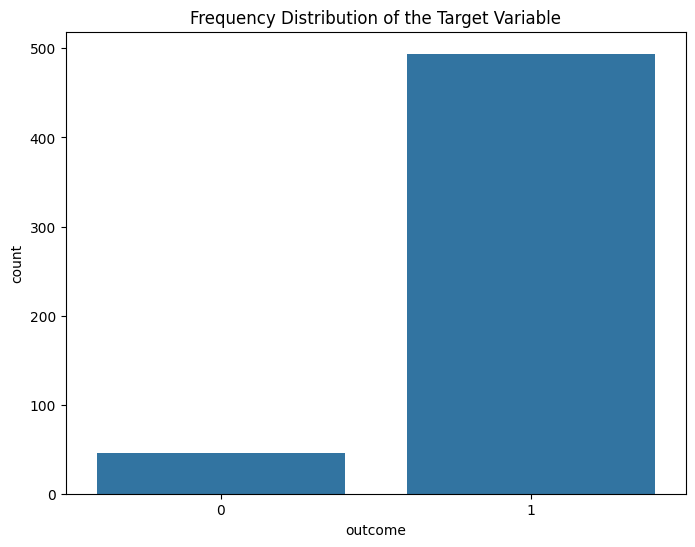

In [59]:
# check the count of the response of the target variable; outcome is the name of your target variable
#this works also; sns.countplot(x='outcome', data=df, order=df['outcome'].value_counts(ascending=True).index)

plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=df)
plt.title('Frequency Distribution of the Target Variable')
plt.show()

This can be an imbalanced data because there are more 1 class than the 0 class.

In [60]:
#before partitioning the data, we need to upsample the unbalanced data
#upsampling the minority value in target variable

target_value_to_upsample = 0
upsample_factor = 9.8  # Increase the number of instances

# Separate the minority class
minority_class = df[df['outcome'] == target_value_to_upsample]

# Calculate the number of instances to upsample
instances_to_upsample = int(len(minority_class) * upsample_factor)

# Upsample the minority class
upsampled_class = minority_class.sample(n=instances_to_upsample, replace=True)

# Concatenate the original DataFrame with the upsampled minority class
upsampled_data = pd.concat([df, upsampled_class])

# Shuffle the DataFrame to mix the instances
upsampled_data = upsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
print(upsampled_data)

     vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_7   ah_corr  \
0       0.555162  0.348562  0.351688  0.618197  0.863873  0.104125  0.787316   
1       0.754823  0.342857  0.988781  0.530047  0.503940  0.668353  0.143071   
2       0.498655  0.416997  0.118568  0.390033  0.462489  0.156874  0.314096   
3       0.830873  0.874048  0.220071  0.809310  0.935033  0.743757  0.773500   
4       0.549942  0.988604  0.381534  0.601424  0.131196  0.208842  0.809848   
..           ...       ...       ...       ...       ...       ...       ...   
985     0.069438  0.117420  0.192879  0.193287  0.120090  0.573027  0.323365   
986     0.917928  0.269368  0.752248  0.686799  0.356055  0.010177  0.018213   
987     0.624787  0.945710  0.557552  0.652853  0.481405  0.931415  0.601884   
988     0.707014  0.746659  0.994755  0.087542  0.054594  0.030033  0.842898   
989     0.008641  0.432523  0.998263  0.110170  0.671009  0.170808  0.207669   

     ah_bolus  slm_corr  efficiency_fac

<Axes: xlabel='outcome', ylabel='count'>

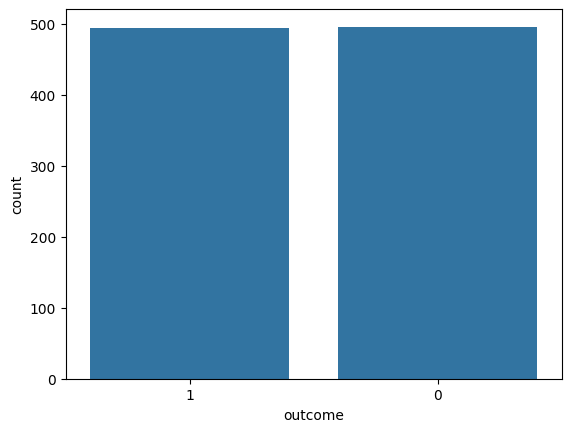

In [61]:
#visualizing the balanced data
sns.countplot(x='outcome', data=upsampled_data, order=upsampled_data['outcome'].value_counts(ascending=True).index)

In [62]:
#Partitioning the data into two parts, the training data (D1), and the test data (D2) into Train set (67%) and Test set (33%)
labels=df['outcome']

# Dropping the target column in the training data
features = df.drop('outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33,shuffle=False, random_state=123)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Assuming X_train, y_train contain your training features and labels

# Define SVM model with Radial kernel
svm_model = SVC(kernel='rbf')

# Define cost values to try
cost_values = [0.01, 0.1, 1, 10, 100, 1000]  # You can adjust these values as needed

# Perform 10-fold cross-validation for each cost value
cv_scores = []
for cost in cost_values:
    svm_model.C = cost
    scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print average accuracy scores for each cost value
for cost, score in zip(cost_values, cv_scores):
    print(f'Cost: {cost}, Accuracy: {score}')


Cost: 0.01, Accuracy: 0.9114114114114112
Cost: 0.1, Accuracy: 0.9114114114114112
Cost: 1, Accuracy: 0.9141891891891891
Cost: 10, Accuracy: 0.9418168168168168
Cost: 100, Accuracy: 0.9418168168168168
Cost: 1000, Accuracy: 0.9418168168168168


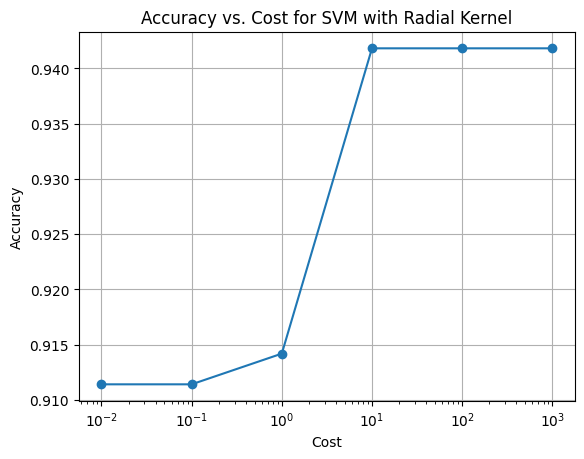

In [64]:
# (b) Plot the training model and explain the graph of Accuracy vs. cost
import matplotlib.pyplot as plt

# Plot Accuracy vs. cost
plt.plot(cost_values, cv_scores, marker='o')
plt.xlabel('Cost')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cost for SVM with Radial Kernel')
plt.xscale('log')  # Log scale for better visualization if cost values vary widely
plt.grid(True)
plt.show()



In [65]:
# (c) After training the model, predict the target variable using test data
# Choose the best cost value based on cross-validation
best_cost_index = np.argmax(cv_scores)
best_cost = cost_values[best_cost_index]
best_svm_model = SVC(kernel='rbf', C=best_cost, random_state=42)
best_svm_model.fit(X_train, y_train)
y_pred = best_svm_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1])

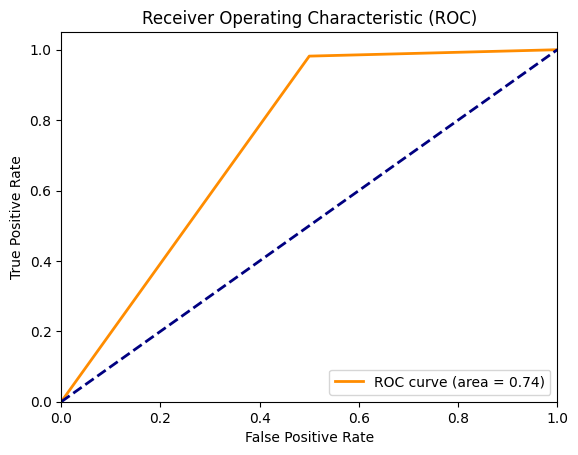

Area under ROC curve (C-index): 0.74


In [66]:
# (d) Present the ROC curve and the area under the curve, i.e., the C-index.
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"Area under ROC curve (C-index): {roc_auc:.2f}")


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Penalty parameter C of the error term
    'gamma': [0.001, 0.01, 0.1, 1]     # Kernel coefficient for 'rbf'
}

# Define SVM model with Radial kernel
svm_model = SVC(kernel='rbf')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=10)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print the mean cross-validated score of the best_estimator
print("Mean cross-validated score of the best_estimator:", grid_search.best_score_)

# Get the results in a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Print tuning parameters vs. accuracy
print(results[['param_C', 'param_gamma', 'mean_test_score']])

# Predict the target variable using test data
predictions = grid_search.predict(X_test)

# Calculate and print the C-index (accuracy)
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy (C-index):", accuracy)

Best parameters found by GridSearchCV:
{'C': 10, 'gamma': 0.1}
Mean cross-validated score of the best_estimator: 0.9557057057057057
   param_C param_gamma  mean_test_score
0      0.1       0.001         0.911411
1      0.1        0.01         0.911411
2      0.1         0.1         0.911411
3      0.1           1         0.911411
4        1       0.001         0.911411
5        1        0.01         0.911411
6        1         0.1         0.911411
7        1           1         0.914189
8       10       0.001         0.911411
9       10        0.01         0.911411
10      10         0.1         0.955706
11      10           1         0.928003
12     100       0.001         0.911411
13     100        0.01         0.950150
14     100         0.1         0.936261
15     100           1         0.928003

Accuracy (C-index): 0.9553072625698324


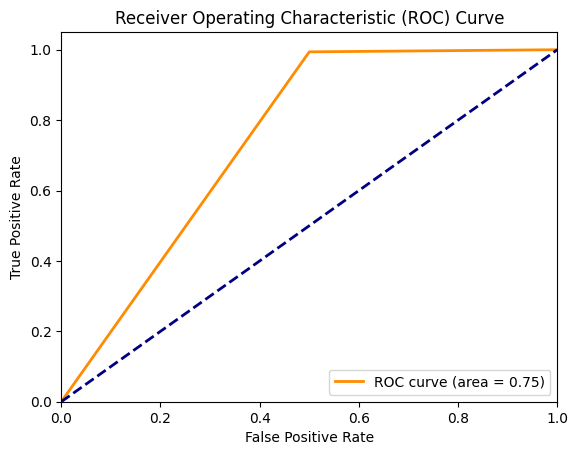

In [68]:

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [69]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Misclassification Rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate:", misclassification_rate)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Mean Squared Error: 0.0446927374301676
Misclassification Rate: 0.04469273743016755
Confusion Matrix:
[[  7   7]
 [  1 164]]


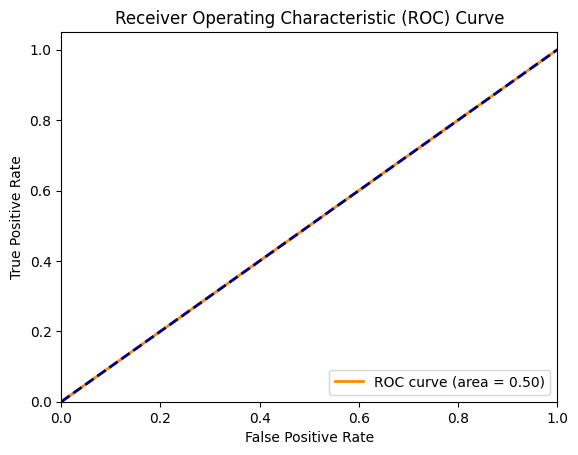

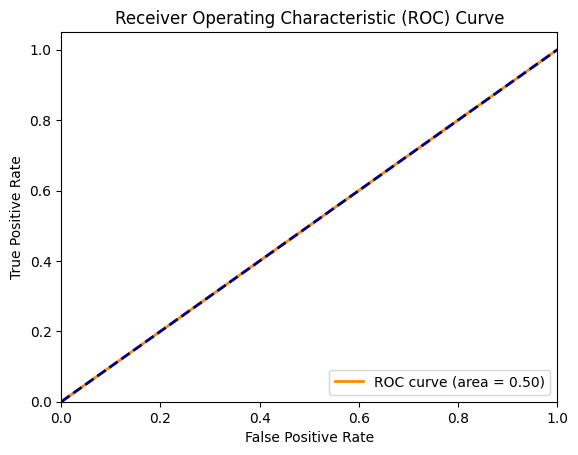

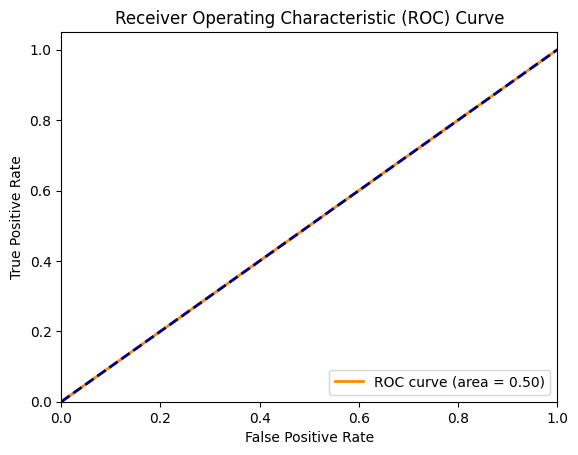

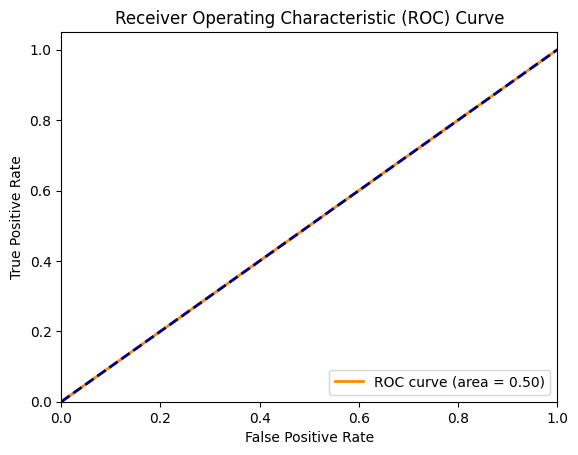

Optimal Tuning Parameters: {'gamma': 0.0001, 'C': 0.01}
Accuracy (C-index): 0.9217877094972067
Mean Squared Error: 0.0782122905027933
Misclassification Rate: 0.07821229050279332
Confusion Matrix:
[[  0  14]
 [  0 165]]


In [71]:
import numpy as np

def anova_rbf_kernel(X, Y, gamma=1e-4):
   # Convert pandas DataFrame to numpy arrays
    X_np = X.values
    Y_np = Y.values

    # Compute pairwise squared distances
    dist_sq = np.sum((X_np[:, np.newaxis] - Y_np[np.newaxis, :]) ** 2, axis=-1)

    # Compute ANOVA-RBF kernel
    return np.exp(-gamma * dist_sq)

# Define the values for gamma and cost
gammas = [1e-4, 1e-1]
costs = [1e-2, 1e2]

# Initialize variables to store best parameters and corresponding metrics
best_params = None
best_accuracy = 0

# Iterate over gamma and cost values
for gamma in gammas:
    for cost in costs:
        # Create SVM model with ANOVA-RBF kernel
        svm_model = SVC(kernel=anova_rbf_kernel, gamma=gamma, C=cost)
        svm_model.fit(X_train, y_train)

        # Predict the target variable using test data
        predictions = svm_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Update best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'gamma': gamma, 'C': cost}

        # Compute ROC curve and area under the curve
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# Report the optimal tuning parameters
print("Optimal Tuning Parameters:", best_params)

# Create SVM model with the best parameters
best_svm_model = SVC(kernel=anova_rbf_kernel, gamma=best_params['gamma'], C=best_params['C'])
best_svm_model.fit(X_train, y_train)

# Predict the target variable using test data
predictions = best_svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy (C-index):", accuracy)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Misclassification Rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate:", misclassification_rate)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


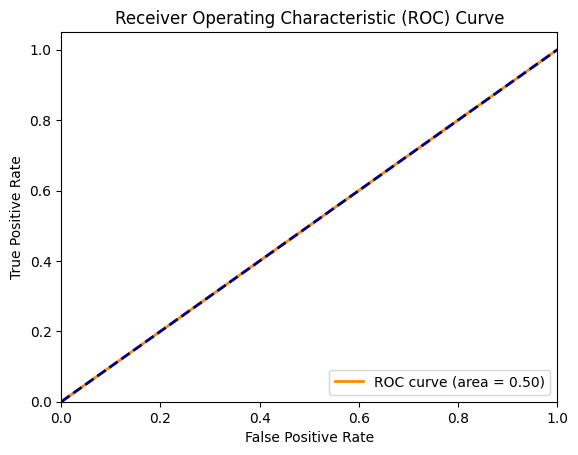

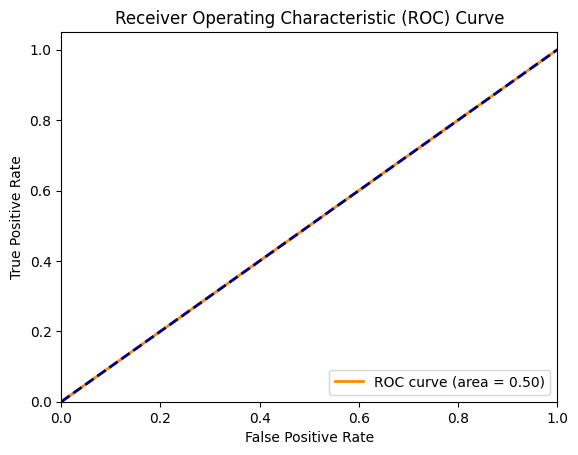

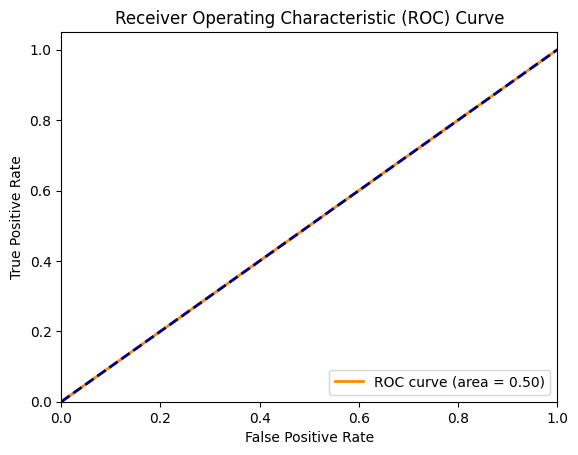

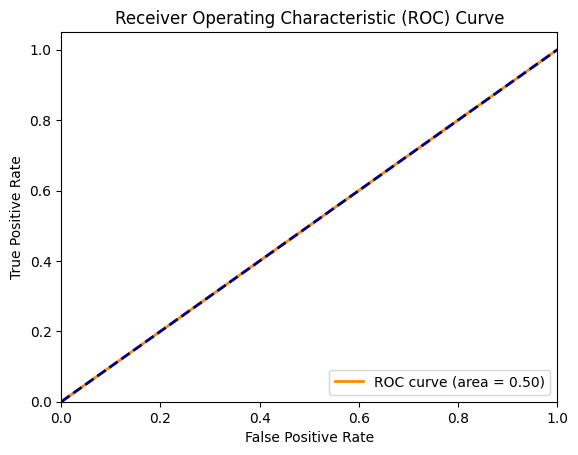

Optimal Tuning Parameters: {'gamma': 0.0001, 'C': 0.01}
Accuracy (C-index): 0.9217877094972067
Mean Squared Error: 0.0782122905027933
Misclassification Rate: 0.07821229050279332
Confusion Matrix:
[[  0  14]
 [  0 165]]


In [ ]:
import numpy as np
from scipy.special import i0

def anova_rbf_kernel(X, Y, gamma=1e-4):
   # Convert pandas DataFrame to numpy arrays
    X_np = X.to_numpy()
    Y_np = Y.to_numpy()

    # Compute pairwise squared distances
    K = np.dot(X_np, Y_np.T)
    norms_sq = np.sum(X_np ** 2, axis=1, keepdims=True)
    norms_sq_Y = np.sum(Y_np ** 2, axis=1, keepdims=True)
    dist_sq = norms_sq - 2 * K + norms_sq_Y.T

    # Compute Bessel function of the first kind
    return i0(gamma * np.sqrt(dist_sq))

# Define the values for gamma and cost
gammas = [1e-4, 1e-1]
costs = [1e-2, 1e2]

# Initialize variables to store best parameters and corresponding metrics
best_params = None
best_accuracy = 0

# Iterate over gamma and cost values
for gamma in gammas:
    for cost in costs:
        # Create SVM model with ANOVA-RBF kernel
        svm_model = SVC(kernel=anova_rbf_kernel, gamma=gamma, C=cost)
        svm_model.fit(X_train, y_train)

        # Predict the target variable using test data
        predictions = svm_model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Update best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'gamma': gamma, 'C': cost}

        # Compute ROC curve and area under the curve
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# Report the optimal tuning parameters
print("Optimal Tuning Parameters:", best_params)

# Create SVM model with the best parameters
best_svm_model = SVC(kernel=anova_rbf_kernel, gamma=best_params['gamma'], C=best_params['C'])
best_svm_model.fit(X_train, y_train)

# Predict the target variable using test data
predictions = best_svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy (C-index):", accuracy)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Misclassification Rate
misclassification_rate = 1 - accuracy
print("Misclassification Rate:", misclassification_rate)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)
